In [19]:
import cv2
import numpy as np

# 1. 이미지를 읽어옵니다.
image = cv2.imread('field_image.png')

# 이미지의 크기를 얻습니다. shape는 (height, width, channels)로 구성됩니다.
height, width, channels = image.shape

# 전체 픽셀 수를 계산합니다.
total_pixels = height * width

# 2. 이미지를 그레이스케일로 변환합니다.
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3. 이진화(binarization)를 수행하여 잡초가 있는 부분과 없는 부분을 구분합니다.
# 임계값은 127로 설정하여, 명암값이 70보다 큰 부분을 잡초가 있는 부분으로 간주합니다.
_, binary_image = cv2.threshold(gray_image, 70, 255, cv2.THRESH_BINARY)

# 4. 잡초가 있는 부분의 픽셀값을 추출(RGB)합니다.
# 잡초가 있는 부분의 픽셀 값은 binary_image가 255인 부분의 픽셀 값입니다.
# weed_pixels = image[binary_image == 255]

# 4. 잡초가 있는 픽셀의 좌표를 추출합니다.
weed_coordinates = np.column_stack(np.where(binary_image == 255))

# 5. 추출한 좌표를 텍스트 파일로 저장합니다.
np.savetxt('weed_coordinates.txt', weed_coordinates, fmt='%d', delimiter=',', header='row,col', comments='')

# 추출한 잡초 부분의 픽셀값을 출력합니다.
# print(weed_pixels)

# 필요한 경우, 추출한 잡초 부분을 별도의 이미지로 저장할 수 있습니다.
weed_image = np.zeros_like(image)
weed_image[binary_image == 255] = image[binary_image == 255]

cv2.imwrite('gray_image.jpg', gray_image)
cv2.imwrite('weed_image.jpg', weed_image)



True

In [20]:
# 이미지 크기와 전체 픽셀 수를 출력합니다.
print(f"Image dimensions: {width} x {height}")
print(f"Total number of pixels: {total_pixels}")
print(f"length of weed coordinates: {len(weed_coordinates)}")

Image dimensions: 612 x 511
Total number of pixels: 312732
length of weed coordinates: 7378


In [21]:
import math

# 방사각
drone_angle = math.radians(160)

# 드론 높이, 단위cm
drone_height = range(1, 6, 1)

#반지름
r = [h * math.tan(drone_angle / 2) for h in drone_height]

# 방사범위
radiation_range = [math.pi * (h * math.tan(drone_angle / 2))**2 for h in drone_height]

In [22]:
r

[5.6712818196177075,
 11.342563639235415,
 17.013845458853122,
 22.68512727847083,
 28.356409098088537]

#### 좌표 적용 방안(나중에 추가 예정)

현재 좌표값은 픽셀단위인데, 이걸 cm단위의 범위 데이터로 바꾸자. 

ex1. 픽셀좌표[0] = [12, 69] = [[12~36], [69~77]] = 새좌표[0]

ex2. 좌표를 분리하기 x[0] = [12~36], y[0] = [69~77]

#### 분사범위 적용 방안
radiation_range = 드론이 커버할 수 있는 범위, 이걸 제약에 추가

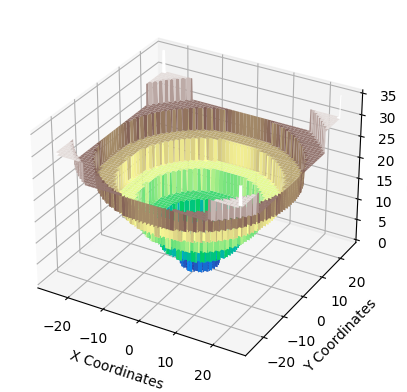

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def terraced_field(x, y):
    # 계단식 농지의 단계별 높이를 정의합니다. 여기서는 간단히 x와 y의 값을 기반으로 계산합니다.
    return np.floor(np.sqrt(x**2 + y**2) / 5) * 5

# 그리드 생성
x = np.linspace(-25, 25, 400)
y = np.linspace(-25, 25, 400)
x, y = np.meshgrid(x, y)
z = (x, y)

# 플롯 설정
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='terrain')

# 축 레이블 설정
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Elevation')

# 표시
plt.show()


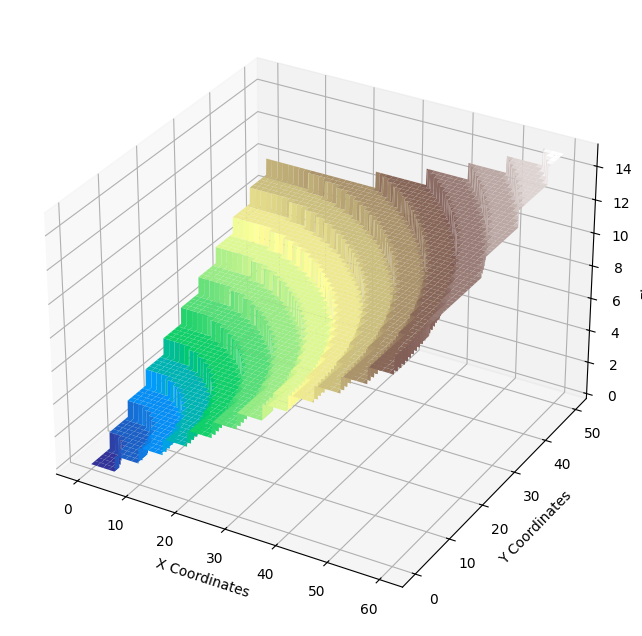

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import noise

def terraced_field_with_noise(x, y, N ,M ,scale=0.1, height_scale=5, noise_scale=1.5):
    # 노이즈를 생성하여 지형에 적용합니다.
    base_noise = noise.pnoise2(scale * N, scale * M) * noise_scale
    # 계단식 농지의 높이를 계산합니다.
    height_filter = 1
    terrace_height = np.floor((np.sqrt(x**2 + y**2) + base_noise) / height_scale) * height_filter
    return terrace_height

N = 600//10
M  = 500//10

# 그리드 생성
x = np.linspace(0, N, N*10)
y = np.linspace(0, M, M*10)
x, y = np.meshgrid(x, y)
z = terraced_field_with_noise(x, y, 400, 400)

# 플롯 설정
fig = plt.figure(figsize=(12, 8))  # 여기서 그래프의 크기를 12x8 인치로 설정합니다.
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='terrain', edgecolor='none')

# 축 레이블 설정
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Elevation')

# 그래프를 45도 회전
# ax.view_init(elev=30, azim=-150)  # elev는 30도로 설정, azim은 45도로 설정

# 표시
plt.show()


In [24]:
f"x*y: {len(z[0])}*{len(z)}"



'x*y: 600*500'

In [25]:
xyz = {"x": [], "y": [], "z": []}
for i in range(len(z[0])):
    for j in range(len(z)):
        xyz["x"].append(i)
        xyz['y'].append(j)
        xyz['z'].append(z[j,i])

In [26]:
import pandas as pd
pd.DataFrame(xyz).to_csv("xyz.csv")